In [1]:
!pip install qiskit

     |████████████████████████████████| 6.4 MB 9.2 MB/s 
     |████████████████████████████████| 17.9 MB 509 kB/s 
     |████████████████████████████████| 237 kB 46.4 MB/s 
     |████████████████████████████████| 200 kB 57.8 MB/s 
     |████████████████████████████████| 53 kB 984 kB/s 
     |████████████████████████████████| 1.4 MB 51.4 MB/s 
     |████████████████████████████████| 943 kB 31.0 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 38.2 MB 1.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.6 MB 52.1 MB/s 
     |████████████████████████████████| 112 kB 84.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.33.0-py3-none-any.whl size=11763 sha256=997c2395d7c2c66ca17d0c46141dbe11a0d37f00599602fa9ec2d3efce6ede34
  Stored in directory: /root/.cache/pip/wheels/d4/60/ef/c49ae113df02818c4ade5fb6e2e89bb928625412eda0bb

In [2]:
#from IPython.core.debugger import set_trace
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [4]:
#Custom library
from __future__ import print_function

import os
import sys
#sys.path.append("../Qiskit_Dynamic_Modelling")
#sys.path.append("./modelQ")
#sys.path.append("./dynamicsQ")
sys.path.append("./sample_data")

from visualize import *
from ode_solver import *
#from network import *
from dataloader import *
from lagrangian import *

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.utils.data
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
#from torchsummary import summary

from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit.circuit.random import random_circuit
from qiskit import transpile, assemble

In [5]:
print("--- Loading training and test data... ---")
train_data = np.load('/content/sample_data/train_dataset.npz')
train_inputs = train_data["input"]
train_labels = train_data["labels"]

X_train = train_inputs[:1000]
y_train = train_labels[:1000]

#train_dataset = DynamicsDataset(train_inputs, train_labels)
train_dataset = DynamicsDataset(X_train, y_train)

train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                                 batch_size=1,
                                                 shuffle=True,
                                                 collate_fn=DynamicsDataset.collate_fn,
                                                 pin_memory=True,
                                                 num_workers=1)
test_data = np.load('/content/sample_data/val_dataset.npz')
test_inputs = train_data["input"]
test_labels = train_data["labels"]
X_test = test_inputs[:1000]
y_test = test_labels[:1000]

test_dataset = DynamicsDataset(X_test, y_test)

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                                 batch_size=1,
                                                 shuffle=False,
                                                 collate_fn=DynamicsDataset.collate_fn,
                                                 pin_memory=True,
                                                 num_workers=1)
print("--- Loading training and test data completed ---")

--- Loading training and test data... ---
--- Loading training and test data completed ---


In [6]:
for (X_train, y_train) in train_dataloader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    print('X_train:', X_train)
    print('y_train:', y_train)
    break

for (X_test, y_test) in test_dataloader:
    print('X_test:', X_test.size(), 'type:', X_test.type())
    print('y_test:', y_test.size(), 'type:', y_test.type())
    print('X_test:', X_test)
    print('y_test:', y_test)
    break

./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


X_train: torch.Size([1, 4]) type: torch.DoubleTensor
y_train: torch.Size([1, 4]) type: torch.DoubleTensor
X_train: tensor([[ 2.4841,  1.1141, -0.1981,  0.2497]], dtype=torch.float64)
y_train: tensor([[-0.1981,  0.2497, -5.2559, -7.7180]], dtype=torch.float64)


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


X_test: torch.Size([1, 4]) type: torch.DoubleTensor
y_test: torch.Size([1, 4]) type: torch.DoubleTensor
X_test: tensor([[ 1.9537,  0.2797, -0.0780, -0.2268]], dtype=torch.float64)
y_test: tensor([[-0.0780, -0.2268, -9.3138, -3.6618]], dtype=torch.float64)


In [7]:
class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        
        all_qubits = [i for i in range(n_qubits)]
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        #set_trace()
        #print('cRun:',thetas)
        List = [thetas]
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = [{self.theta: theta} for theta in List])
        #set_trace()
        job = self.backend.run(qobj)
        result = job.result().get_counts()
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
        
        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        
        return np.array([expectation])

In [8]:
simulator = qiskit.Aer.get_backend('aer_simulator')

circuit = QuantumCircuit(1, simulator, 100)
#data = [2.1757166385650635]
print('Expected value for rotation pi {}'.format(circuit.run(2.1757166385650635)))
#print('Expected value for rotation pi {}'.format(circuit.run([1.4173])))
circuit._circuit.draw()

Expected value for rotation pi [0.9]


┌───┐ ░ ┌───────────┐ ░ ┌─┐
     q: ┤ H ├─░─┤ Ry(theta) ├─░─┤M├
        └───┘ ░ └───────────┘ ░ └╥┘
meas: 1/═════════════════════════╩═
                                 0

In [9]:
class HybridFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        ##print('hFor:', input)
        #print('hFor1:', input[0])
        #print('hFor2:', input[0].tolist())
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit
        #expectation_z = []
        #for i in range(len(input)):
        #    expectation_z.append(ctx.quantum_circuit.run(input[i].tolist()))
        #print('expectation_z',expectation_z)
        expectation_z = ctx.quantum_circuit.run(input[0].tolist())
        result = torch.tensor([expectation_z])
        #result = torch.tensor(expectation_z)
        ctx.save_for_backward(input, result)

        return result
        
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(Hybrid, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        #print('3',input)
        return HybridFunction.apply(input, self.quantum_circuit, self.shift)

In [10]:
class LagrangianNeuralNetwork(torch.nn.Module):
    def __init__(self, D_in, hidden_list, D_out):
        """
        Neural Network used to approximate a paramaterized system lagrangian
        """
        super(LagrangianNeuralNetwork, self).__init__()
        self.model_layers = torch.nn.ModuleList()

        # input layer
        self.model_layers.append(torch.nn.Linear(D_in, hidden_list[0]))
        # self.model_layers.append(torch.nn.BatchNorm1d(hidden_list[0]))
        self.model_layers.append(torch.nn.Softplus())
        #self.model_layers.append(Hybrid(qiskit.Aer.get_backend('aer_simulator'), 100, np.pi / 2))
        # add all hiden layers
        for i in range(1, len(hidden_list)):
            self.model_layers.append(torch.nn.Linear(hidden_list[i-1], hidden_list[i]))
            # self.model_layers.append(torch.nn.BatchNorm1d(hidden_list[i]))
            self.model_layers.append(torch.nn.Softplus())

        #self.hybrid = Hybrid(qiskit.Aer.get_backend('aer_simulator'), 100, np.pi / 2)
        #self.model_layers.append(Hybrid(qiskit.Aer.get_backend('aer_simulator'), 100, np.pi / 2))
        # output layer
        self.model_layers.append(torch.nn.Linear(hidden_list[-1], D_out))
        self.model_layers.append(torch.nn.Softplus())

    def forward(self, x):
        """
        applies all of the model layers, and returns the single output value,
        which in this case is the lagrangian of the system, representing the
        total energy
        """
        for layer in self.model_layers:
            x = layer(x)
        return x

In [11]:
# determine device
print("--- Checking for CUDA Device... ---")
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

--- Checking for CUDA Device... ---


In [12]:
# organize data
input_size = train_inputs.shape[1]
output_size = 1  # for all lagrangian systems, output should be just a scalar energy value

# build model
print("--- Constructing Model... ---")
D_in = input_size  # state size
# hidden_list = [D_in, 256, 256, 256, 256, 256]
hidden_list = [D_in, 32, 64, 128, 256, 512, 256, 128, 64, 32]
D_out = output_size
lnn_model = LagrangianNeuralNetwork(D_in, hidden_list, D_out)
#summary(lnn_model, (1, 28, 28), device='cpu')
# set up training parameters
learning_rate = 1e-4
weight_decay = 1e-5
momentum = 0.9
num_epochs = 20
optimizer = torch.optim.Adam(lnn_model.parameters(),
                             lr=learning_rate,
                             weight_decay=weight_decay)

if os.path.isfile("model_weights.pth"):
    print("Re-loading existing weights!")
    checkpoint = torch.load("model_weights.pth")
    lnn_model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# ensure model is in train mode so gradients are properly calculated
lnn_model.train()
# load device to either GPU or CPU depending on hardware
lnn_model.to(device)

# set up loss function
loss_fcn = torch.nn.MSELoss()

# set up GradScaler to improve run speed
scaler = torch.cuda.amp.GradScaler()

--- Constructing Model... ---


/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


In [13]:
import time
print("--- Beginning Training! ---")
loss_listQCQ = []
lnn_model.train()
startTimeQCQ = time.time()
print('Training Start Time (in sec) : ',(startTimeQCQ))
print('Training Start Time : ',(time.asctime( time.localtime(time.time()) )))
for epoch in range(num_epochs):
    total_lossQCQ = []
    for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        for p in lnn_model.parameters(): p.grad = None
        # Forward pass
        #output = model(data)
        # Calculating loss
        #loss = loss_func(output, target)
        # output from model is the energy calculated from the parameterized lagrangian
        #print('1',data)
        #print('1',data.detach().numpy())
        #for val in enumerate(data.detach().numpy()):
        #    print(val)
        Listk = []
        for val in data.detach().numpy():
            #print(val)            
            for i in range(len(val)):
                #print(val[i])
                qcr = circuit.run(val[i])
                #print(qcr[0])
                Listk.append(qcr[0])
                #print(Listk)
                
        ListTarget = []
        #print(target)
        for valT in target.detach().numpy():
            #print(val)            
            for j in range(len(valT)):
                #print(val[i])
                qcrT = circuit.run(valT[j])
                #print(qcr[0])
                ListTarget.append(qcrT[0])
                #print(ListTarget)
        targetData = torch.tensor(ListTarget)
        data = torch.squeeze(torch.tensor(Listk))
        #data = torch.squeeze(data)
        with torch.cuda.amp.autocast():
            target_pred = solve_euler_lagrange(lnn_model.forward, data.float())
            #print('1',target_pred)
            #print('2',target.float())
            loss = loss_fcn(target_pred.unsqueeze(0), targetData.float())
        # Backward pass
        scaler.scale(loss).backward()
        # Optimize the weights
        scaler.step(optimizer)
        # update the scale for next iteration
        scaler.update()

        #print("Iter Num: ", batch_idx)
        '''
        if (batch_idx == 10):
            #print("Iter Num: ", batch_idx)
            break
        '''
        #print("Iter Num: ", len(train_dataloader))
        #print("Iter Num: ", batch_idx)
        total_lossQCQ.append(loss.item())
    loss_listQCQ.append(sum(total_lossQCQ)/len(total_lossQCQ))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / num_epochs, loss_listQCQ[-1]))
print('Training End Time (in sec) : ',(time.time()))
print('Total training time (in sec)', ((time.time() - startTimeQCQ)))
print('Training End Time',(time.asctime( time.localtime(time.time()) )))
print('end')

--- Beginning Training! ---
Training Start Time (in sec) :  1639001956.168983
Training Start Time :  Wed Dec  8 22:19:16 2021


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training [5%]	Loss: 0.0987


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [10%]	Loss: 0.0704


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [15%]	Loss: 0.0683


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [20%]	Loss: 0.0661


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [25%]	Loss: 0.0664


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [30%]	Loss: 0.0644


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [35%]	Loss: 0.0645


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [40%]	Loss: 0.0636


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [45%]	Loss: 0.0636


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [50%]	Loss: 0.0637


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [55%]	Loss: 0.0621


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [60%]	Loss: 0.0621


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [65%]	Loss: 0.0617


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [70%]	Loss: 0.0619


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [75%]	Loss: 0.0616


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [80%]	Loss: 0.0615


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [85%]	Loss: 0.0618


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [90%]	Loss: 0.0612


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [95%]	Loss: 0.0613


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


Training [100%]	Loss: 0.0618
Training End Time (in sec) :  1639004304.6900856
Total training time (in sec) 2348.521541595459
Training End Time Wed Dec  8 22:58:24 2021
end


Text(0, 0.5, 'Loss')

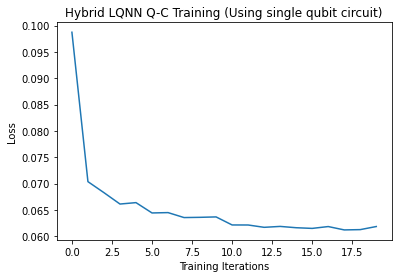

In [16]:
plt.plot(loss_listQCQ)
plt.title('Hybrid LQNN Q-C Training (Using single qubit circuit)')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
#plt.show()

In [ ]:
print("--- Beginning Test! ---")
lnn_model.eval()
total_losstestQCQ = []
correctQCQ = 0
for batch_idx, (data, target) in enumerate(test_dataloader):
    data, target = data.to(device), target.to(device)
    data = torch.squeeze(data)
    with torch.cuda.amp.autocast():
        target_pred = solve_euler_lagrange(lnn_model.forward, data.float())
        #print(target_pred)
        #print(target)
        correctQCQ += target_pred.eq(target.view_as(target_pred)).sum().item()
        loss = loss_fcn(target_pred.unsqueeze(0), target.float())        
    total_losstestQCQ.append(loss.item())
batch_size = 1
print('Performance on test data:[{:.0f}%]\tLoss: {:.4f}\tAccuracy: {:.1f}%'.format(
    100. * (epoch + 1) / num_epochs,
    sum(total_losstestQCQ) / len(total_losstestQCQ),
    correctQCQ / len(test_dataloader) * 100 / batch_size)
    )

print('end')

--- Beginning Test! ---


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


Performance on test data:[100%]	Loss: 22.0757	Accuracy: 0.0%
end
